# Section 2 - Descriptive Statistics
You should also have downloaded:
- stocks.csv

## 0 Load and display

We load data on monthly stock returns from 1926 to 2021 ([source](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)) and store it in an $\texttt{ndarray}$ for you.

In [11]:
# Module for arrays.
import numpy as np
# Module for data frames.
import pandas as pd

# Load stock data as pandas DataFrame.
stocks = pd.read_csv("stocks.csv")
# Display DataFrame.
display(stocks)
# Store stock return variable values in a NumPy array.
ret = stocks["Mkt-RF"].values

FileNotFoundError: [Errno 2] No such file or directory: 'stocks.csv'

In [ ]:
# Print the "ret" variable.
print(ret)

[2.96 2.64 0.36 ... 0.35 6.46 3.21]


In [ ]:
# Print the type of the "ret" variable.
print(type(ret))

<class 'numpy.ndarray'>


## 1 Compute Statistics (manual implementation)
**Task:** implement your own functions for these descriptive statistics below. 
- mean
- variance
- standard deviation
- skewness
- kurtosis

The functions should be designed to operate on a one-dimensional $\texttt{ndarray}$. You may use other Scipy and Numpy functions in your implementations.  Apply your functions to the $\texttt{ret}$ data to test them.

In [ ]:
# Sample mean. 
# use len() and np.sum() 
def my_mean(arr):
    return np.sum(arr)/len(arr)

In [ ]:
# Unbiased sample variance.
# use len(), my_mean(), and np.sum() 
# tip: make a variable for each meaningful term in the formula. makes it easier to debug
def my_var(arr):
    deviations = np.sum((arr - my_mean(arr))**2)
    return (1/(len(arr) - 1)) * deviations
    

In [ ]:
# Sample standard deviation derived from unbiased sample variance.
# use np.sqrt() and my_var()
def my_std(arr):
    return np.sqrt(my_var(arr))

Let $n$ be the number of samples, $x_1, \dots, x_n$ be the data, and $\overline{x}$ be the sample mean. Define the moments
$$m_k = \frac{1}{n} \sum_i (x_i - \overline{x})^k.$$

The adjusted (unbiased) Fisher-Pearson coefficient of **skewness** is
$$
 \frac{\sqrt{n(n-1)}}{n-2} \frac{m_3}{m_2^{3/2}}.
$$


In [ ]:
# Adjusted (unbiased) Fisher-Pearson coefficient of skewness.
# See scipy.stats.skew documentation for the formula. Remember to center the data with the mean before using the formula
# use len(), my_mean(), np.sum(), np.sqrt()
# tip: as before, make variables for each meaningful term
def my_skew(arr):
    n = len(arr)
    m_3 = (1/(len(arr))) * np.sum(np.power(arr - my_mean(arr),3))
    m_2 = (1/(len(arr))) * np.sum(np.power(arr - my_mean(arr),2))
    expression = (np.sqrt(n*(n-1)) * m_3)/((n-2)*np.power(m_2,3/2))
    
    return expression

The unbiased Fisher coefficient of **excess kurtosis** is
$$
 \frac{n-1}{(n-2)(n-3)} \left[\frac{(n+1) m_4}{m_2^2} - 3(n-1)\right].
$$

In [ ]:
# Adjusted Fisher coefficient of excess kurtosis.
# See "sample kurtosis > standard unbiased estimator" in Kurtosis wikipedia page. This lines up with scipy.stats.kurtosis documentation, that unfortunately does not show the formula.
# use len(), my_mean(), np.sum()
# tip: as before, make variables for each meaningful term
def my_kurt(arr):
    n = len(arr)
    m_4 = (1/(len(arr))) * np.sum(np.power(arr - my_mean(arr),4))
    m_2 = (1/(len(arr))) * np.sum(np.power(arr - my_mean(arr),2))
    expression = (((n-1)*(n+1))/((n-2)*(n-3))) * (( ((n+1)*m_4)/(np.power(m_2,2)) ) - 3*(n-1))
    return expression

Written for you is the code to print all these results out. 
- Take some time to understand what each line of code is doing. Presenting numbers with easy-to-read prints will be a helpful skill for your own coding.

In [ ]:
# List of labels to print.
label = ["Mean", "Variance", "Standard Deviation", "Skewness", "Kurtosis"]
# List of statistics.
my_value = [my_mean(ret), my_var(ret), my_std(ret), my_skew(ret), my_kurt(ret)]
# Print table.
print("*** My Functions ***")
for i in range(len(label)):
    # Print results in two columns.
    # "{}" is a placeholder for a string.


    # ":" indicates start of format specification.
    # "<" indicates left alignment.
    # "25" indicates field width of 25 characters.
    print("{:<25} {}".format(label[i], my_value[i]))

*** My Functions ***
Mean                      0.6785064377682404
Variance                  28.564041066324506
Standard Deviation        5.344533755747503
Skewness                  0.15628277114358533
Kurtosis                  8687.147629920362


## 2 Compare against SciPy and NumPy

**Task:** Compute the same quantities using the corresponding SciPy or NumPy functions with default arguments. 

In [ ]:
# The point of this exercise:
# There are different definitions of the above statistics.
# Some implementations provide parameters that let you choose versions.

# Import specific functions from SciPy.
from scipy.stats import skew, kurtosis

# List of labels.
label = ["Mean", "Variance", "Standard Deviation", "Skewness", "Kurtosis"]
# List of statistics.
package_value = [np.mean(ret),np.var(ret, ddof=1),np.std(ret),skew(ret),kurtosis(ret)]
# Print table.
print("{:<25} {:<20} {:<20}".format('', 'my functions', 'scipy/numpy'))
for i in range(len(label)):
    print("{:<25} {:<20} {:<20}".format(label[i], my_value[i], package_value[i]))

                          my functions         scipy/numpy         
Mean                      0.6785064377682404   0.6785064377682404  
Variance                  28.564041066324506   28.564041066324506  
Standard Deviation        5.344533755747503    5.342239471994757   
Skewness                  0.15628277114358533  0.1560814766802238  
Kurtosis                  8687.147629920362    7.413300610425784   


**Discuss:** Do your functions give different results from those of the numpy/scipy implementations?

**Task:** If they are different
- is your implementations incorrect, or 
- can you adjust some parameters of the SciPy or NumPy functions to get the same results as your manual implementations?

In [ ]:
# Results differ for variance, standard deviation, skewness, and kurtosis.
# This is because the default parameters set the functions to compute alternative versions of the statistics.

# We can adjust the parameters to match our versions of the statistics.
# Note the extra arguments to the functions.
label = ["Mean", "Variance", "Standard Deviation", "Skewness", "Kurtosis"]
package_value_adj = None # TODO

# Print table.
print("{:<25} {:<20} {:<20}".format('', 'my functions', 'scipy/numpy'))
for i in range(len(label)):
    print("{:<25} {:<20} {:<20}".format(label[i], my_value[i], package_value_adj[i]))

                          my functions         scipy/numpy         


TypeError: 'NoneType' object is not subscriptable

## 3 Are stocks normally distributed? Visual comparison.

The normal distribution is commonly used to model natural and social phenomena. Investigate whether the hypothesis that stock return is normally distributed is plausible.

**Task:**
- Use scipy to simulate draws from a normal distribution having 
    - mean equal to the sample mean of the stock returns and 
    - standard deviation equal to the sample standard deviation of the stock returns. 
    - Use a random state of 0, and 
    - for the number of draws, use the number of stock return observations.
- (Done for you) Compare histograms of the simulated data and the actual stock returns. 
    - **Discuss:** Note how we choose the bins carefully. If you changed the 'bins=mybins' to 'bins=100', what difference do you see?

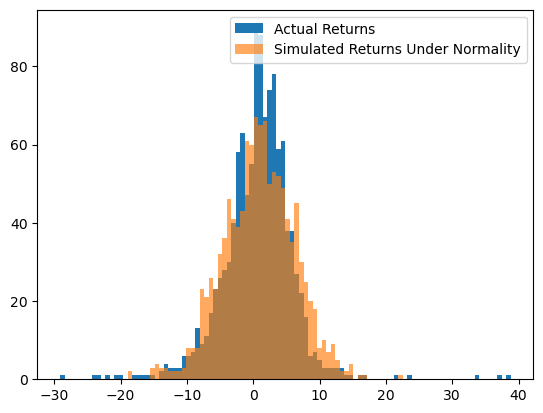

In [ ]:
from scipy.stats import norm as gaussian
import matplotlib.pyplot as plt

n = len(ret)
mean = np.mean(ret)
std_dev = np.std(ret)

sim = gaussian.rvs(loc = mean,scale = std_dev, size = n)

_, mybins, _ = plt.hist(ret, bins=100, label="Actual Returns")
plt.hist(sim, bins=mybins, alpha=0.66, label="Simulated Returns Under Normality")
plt.legend()
plt.show()